# Lead Scoring Case Study

# Step 1 - Importing/Reading Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries

import pandas as pd, numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

In [2]:
# Importing dataset
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# checking the dataset
lead_data.shape

(9240, 37)

There are 9240 records and 37 features

In [4]:
# checking the data types
lead_data.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

All features seems to have right data types

In [5]:
# checking info of the dataset
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There ae missing values for certain features

In [6]:
# describing the data
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 2 - Exploratory Data Analysis (EDA) and Data Cleaning

Handling the 'Select' value

lead_data includes Select value in the categorical variables. Replacing this with nan before hanling missing values in the data


In [7]:
# Converting 'Select' values to NaN.
lead_data = lead_data.replace('Select', np.nan)

In [8]:
# checking for null values in percentage
round(100*(lead_data.isnull().sum()/len(lead_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

There are few variables with the null values % greater than 40%

In [9]:
# dropping the columns with null values greater than 40%
lead_data=lead_data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'])
lead_data.shape

(9240, 30)

In [10]:
# Re-checking for null values in percentage
round(100*(lead_data.isnull().sum()/len(lead_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [11]:
#Tags variable includes 36% missing value. Checking this column values
lead_data.Tags.value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [12]:
# Checking the mode for Tags column
lead_data.Tags.mode()

0    Will revert after reading the email
Name: Tags, dtype: object

In [13]:
# using mode to impute missing values in Tags column

lead_data['Tags']=lead_data['Tags'].replace(np.nan,'Will revert after reading the email')
lead_data.Tags.value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

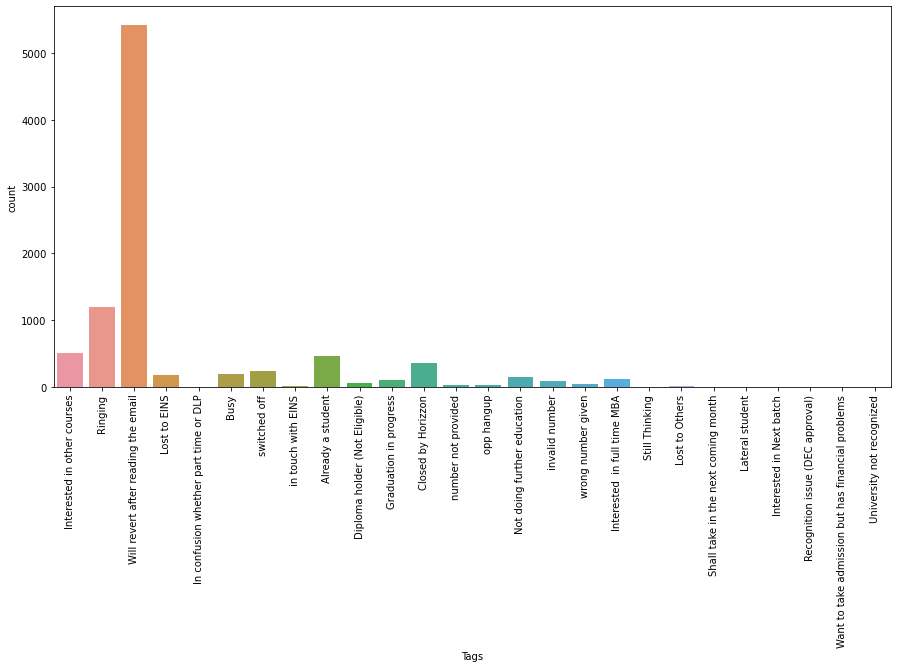

In [14]:
# visualizng tags
plt.figure(figsize=(15,7))
sns.countplot(lead_data['Tags'])
plt.xticks(rotation=90)
plt.show()


In [15]:
# checking What matters most to you in choosing a course

lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [16]:
# using mode to impute missing values in this column

lead_data['What matters most to you in choosing a course']=lead_data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')
lead_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

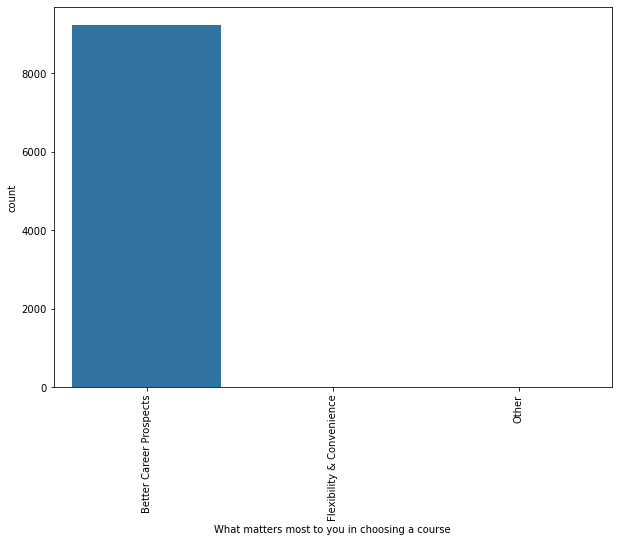

In [17]:
# visualizing
plt.figure(figsize=(10,7))
sns.countplot(lead_data['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.show()

In [18]:
# Checking column What is your current occupation
lead_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [19]:
# impute missing values in this column with 'Not_provided' for Nan and grouping Businessman, Housewife, other under Other_Occupation

lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,'Not_Provided')
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(['Housewife','Businessman', 'Other'],'Other_Occupation')
lead_data['What is your current occupation'].value_counts()

Unemployed              5600
Not_Provided            2690
Working Professional     706
Student                  210
Other_Occupation          34
Name: What is your current occupation, dtype: int64

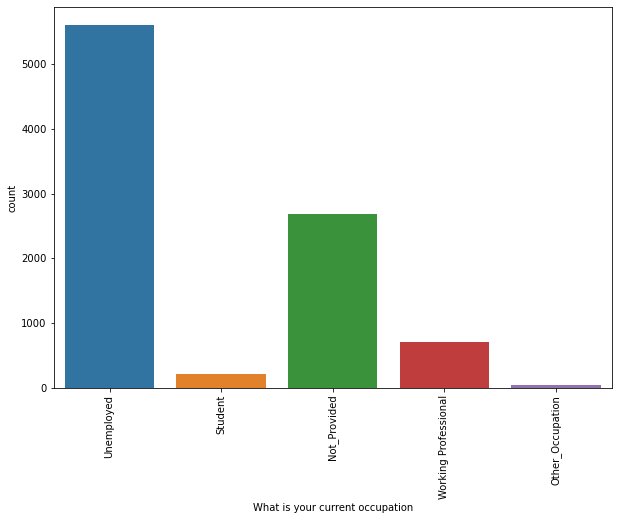

In [20]:
plt.figure(figsize=(10,7))
sns.countplot(lead_data['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

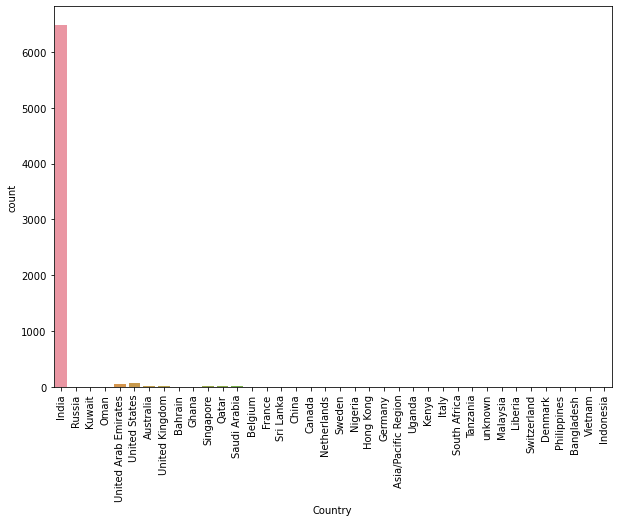

In [21]:
# checking Country
plt.figure(figsize=(10,7))
sns.countplot(lead_data['Country'])
plt.xticks(rotation=90)
plt.show()

In [22]:
# checking moe
lead_data.Country.mode()

0    India
Name: Country, dtype: object

In [23]:
# Using mode to impute missing values in this column

lead_data['Country']=lead_data['Country'].replace(np.nan,'India')
lead_data['Country'].value_counts(dropna=False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [24]:
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    else:
        category = "Outside India"
    return category

lead_data['Country'] = lead_data.apply(lambda x:slots(x['Country']), axis = 1)
lead_data['Country'].value_counts(normalize=True)

India            0.968939
Outside India    0.031061
Name: Country, dtype: float64

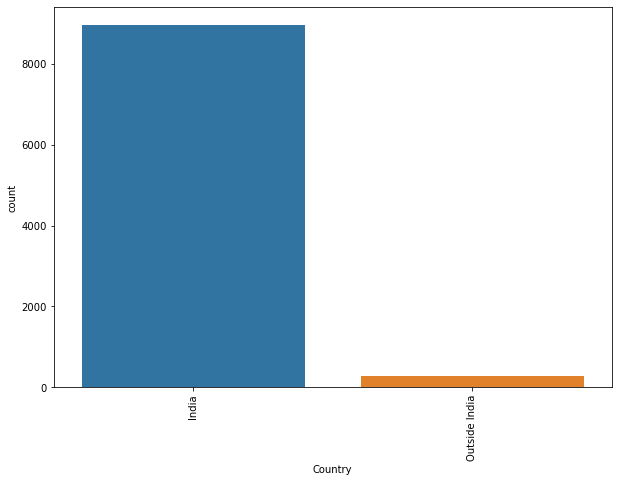

In [25]:
# Visualizing Country
plt.figure(figsize=(10,7))
sns.countplot(lead_data['Country'])
plt.xticks(rotation=90)
plt.show()

In [26]:
# checking Specialization

lead_data.Specialization.value_counts(normalize=True, dropna=False)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [27]:
# Replace nan to 'Not Specified'

lead_data['Specialization']=lead_data['Specialization'].replace(np.nan, 'Not Specified_Specialization')
lead_data['Specialization'].value_counts()


Not Specified_Specialization         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

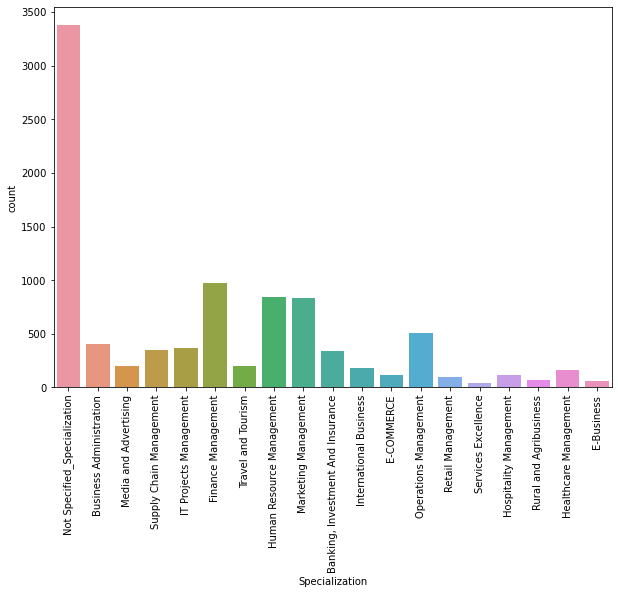

In [28]:
# Visualizng Specialization
plt.figure(figsize=(10,7))
sns.countplot(lead_data['Specialization'])
plt.xticks(rotation=90)
plt.show()


In [29]:
# checking City 
lead_data.City.value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [30]:
lead_data['City'].value_counts(normalize=True, dropna=False)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [31]:
# checking the mode
lead_data.City.mode()

0    Mumbai
Name: City, dtype: object

In [32]:
# Impute the missing value in the City using mode which is Mumbai

lead_data['City']=lead_data['City'].replace(np.nan, 'Mumbai')
lead_data['City'].value_counts()

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [33]:
# grouping cities into comman bucket
lead_data['City']=lead_data['City'].replace(['Tier II Cities','Other Metro Cities'], 'Other Metro Cities')
lead_data['City']=lead_data['City'].replace('Thane & Outskirts', 'Other Cities of Maharashtra')
lead_data['City'].value_counts()

Mumbai                         6891
Other Cities of Maharashtra    1209
Other Cities                    686
Other Metro Cities              454
Name: City, dtype: int64

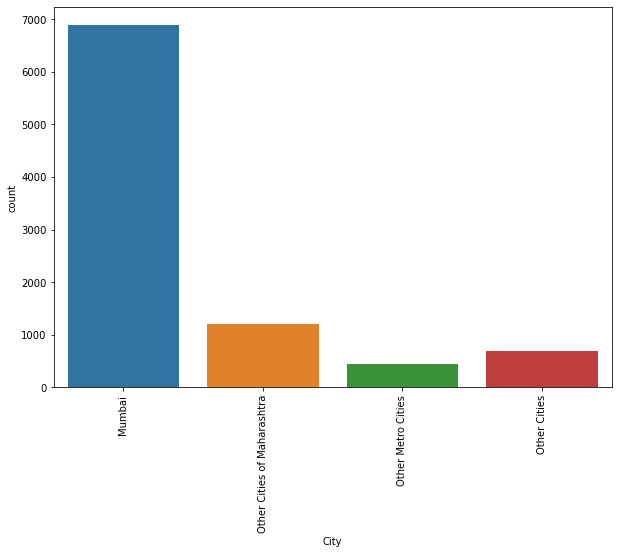

In [34]:
# visualizing City
plt.figure(figsize=(10,7))
sns.countplot(lead_data['City'])
plt.xticks(rotation=90)
plt.show()

In [35]:
# Re-checking for null values in percentage
round(100*(lead_data.isnull().sum()/len(lead_data.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [36]:
lead_data.shape

(9240, 30)

In [37]:
# Other columns have missing alue which is 1% to 2%. Hence droppin those values
lead_data.dropna(inplace = True)

In [38]:
lead_data.shape

(9074, 30)

In [39]:
# Re-checking for null values in percentage
round(100*(lead_data.isnull().sum()/len(lead_data.index)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [40]:
# Check if any duplicate records

lead_data[lead_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There are no duplicates

# Univaiate/Bivariate  Analysis

In [41]:
lead_data.select_dtypes(include=['object','category']).columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

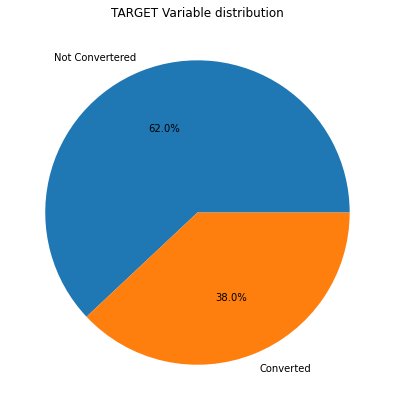

In [42]:
# Visualizing Converted - target variable
plt.figure(figsize=(10,7))
lables = ['Not Convertered','Converted']
plt.pie(round(lead_data.Converted.value_counts(normalize=True),2),labels=lables, autopct='%1.1f%%')
plt.title('TARGET Variable distribution')
plt.show()

Based on the data lead conversion rate is 38%

# Categorical variable Analysis

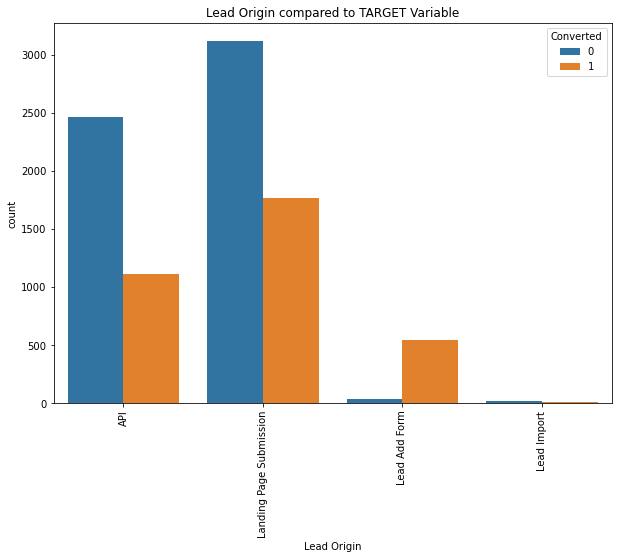

In [43]:
# Visualizing Lead Origin with target variable

plt.figure(figsize=(10,7))
sns.countplot(x='Lead Origin',hue='Converted',data=lead_data)
plt.xticks(rotation=90)
plt.title('Lead Origin compared to TARGET Variable')
plt.show()

Lead Add Form has good conversion rate
Landing Page Submission has higher conversion rate compared to API.

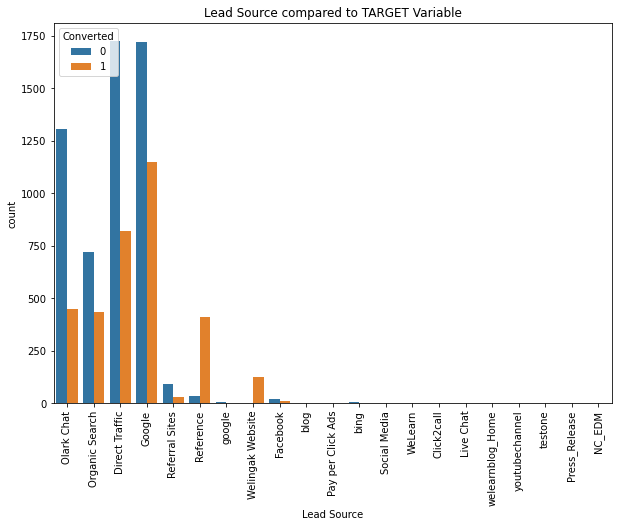

In [44]:
# Visualizing Lead Source with target variable

plt.figure(figsize=(10,7))
sns.countplot(x='Lead Source',hue='Converted',data=lead_data)
plt.xticks(rotation=90)
plt.title('Lead Source compared to TARGET Variable')
plt.show()

In [45]:
# Google word is available in two diffeent ways. Replace 'google' with 'Google', Merger Facebook and Social Media
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Facebook'], 'Social Media')

# Replace All other sources to a new category 'Others' since they do not have high number
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Referral Sites','blog','Pay per Click Ads','bing','WeLearn','Click2call','Live Chat','welcomeblog_Home','youtubechannel','testone','Press_Release','NC_EDM','welearnblog_Home'], 'Other_Lead_Source')

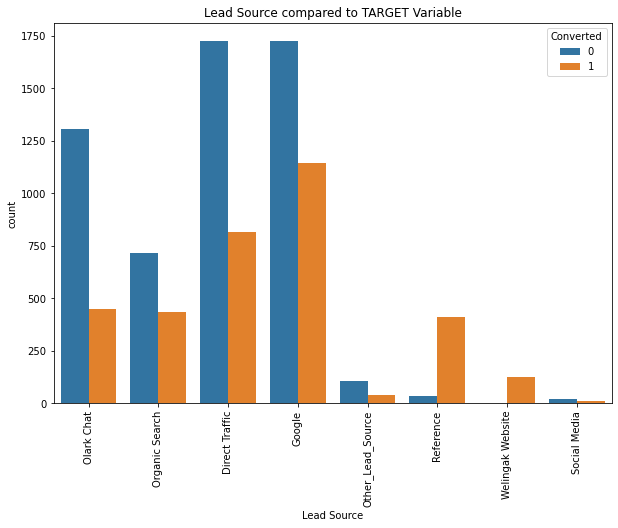

In [46]:
# Visualizing Lead Source with target variable

plt.figure(figsize=(10,7))
sns.countplot(x='Lead Source',hue='Converted',data=lead_data)
plt.xticks(rotation=90)
plt.title('Lead Source compared to TARGET Variable')
plt.show()

Conversion rate is high for Reference and Welingak Website

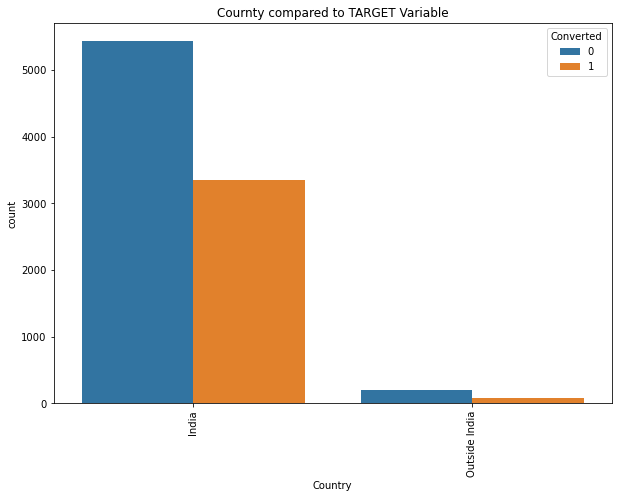

In [47]:
# Visualizing Country with target variable

plt.figure(figsize=(10,7))
sns.countplot(x='Country',hue='Converted',data=lead_data)
plt.xticks(rotation=90)
plt.title('Cournty compared to TARGET Variable')
plt.show()


India has higher conversion rate

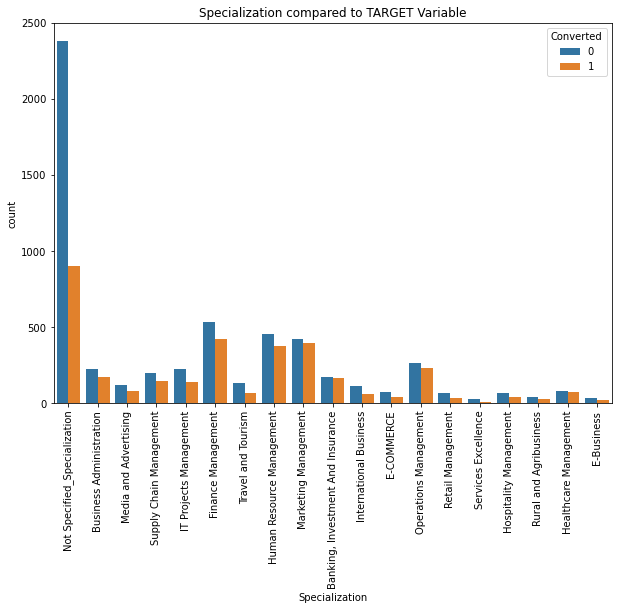

In [48]:
# Visualizing Specialization with target variable

plt.figure(figsize=(10,7))
sns.countplot(x='Specialization',hue='Converted',data=lead_data)
plt.xticks(rotation=90)
plt.title('Specialization compared to TARGET Variable')
plt.show()


In [49]:
# grouping E-business with E-commerc
lead_data['Specialization'] = lead_data['Specialization'].replace(['E-Business'], 'E-COMMERCE')

# combinng management cateogory into one group Manaagement_Specialization
lead_data['Specialization'] = lead_data['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'], 'Management_Specialization')

lead_data.Specialization.value_counts()


Management_Specialization            4197
Not Specified_Specialization         3282
Business Administration               399
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
E-COMMERCE                            168
Rural and Agribusiness                 73
Services Excellence                    40
Name: Specialization, dtype: int64

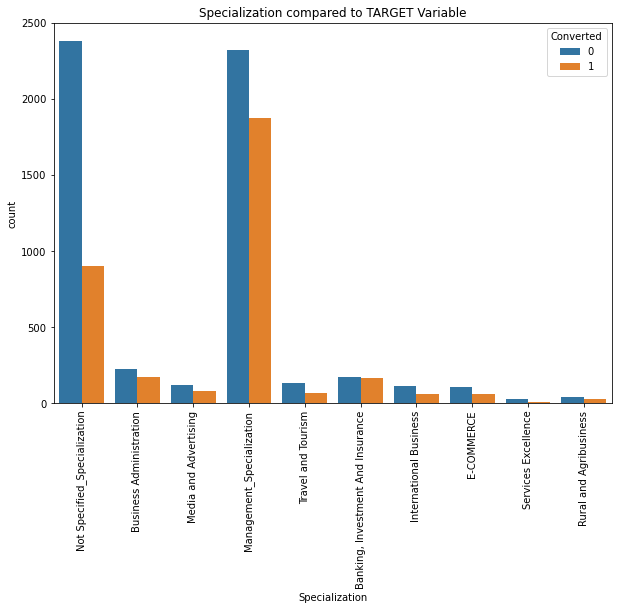

In [50]:
# Re-Visualizing Specialization with target variable

plt.figure(figsize=(10,7))
sns.countplot(x='Specialization',hue='Converted',data=lead_data)
plt.xticks(rotation=90)
plt.title('Specialization compared to TARGET Variable')
plt.show()


Conversion rate is good for management specialization

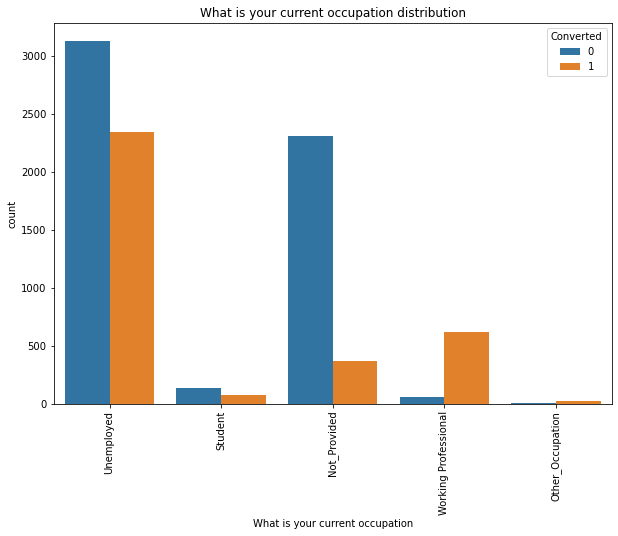

In [51]:
#Visualizing What is your current occupation with target variable

plt.figure(figsize=(10,7))
sns.countplot(x='What is your current occupation',hue='Converted',data=lead_data)
plt.xticks(rotation=90)
plt.title('What is your current occupation distribution')
plt.show()

Working professional has higher conversion rate
Unemployed also have a good conversion rate

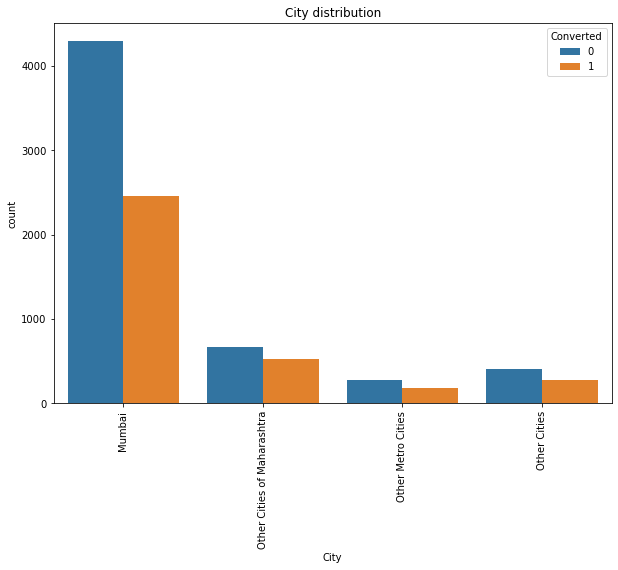

In [52]:
#Visualizing City with target variable

plt.figure(figsize=(10,7))
sns.countplot(x='City',hue='Converted',data=lead_data)
plt.xticks(rotation=90)
plt.title('City distribution')
plt.show()

Mumbai has higher conversion rate followd by other cities also part of Maharastra.

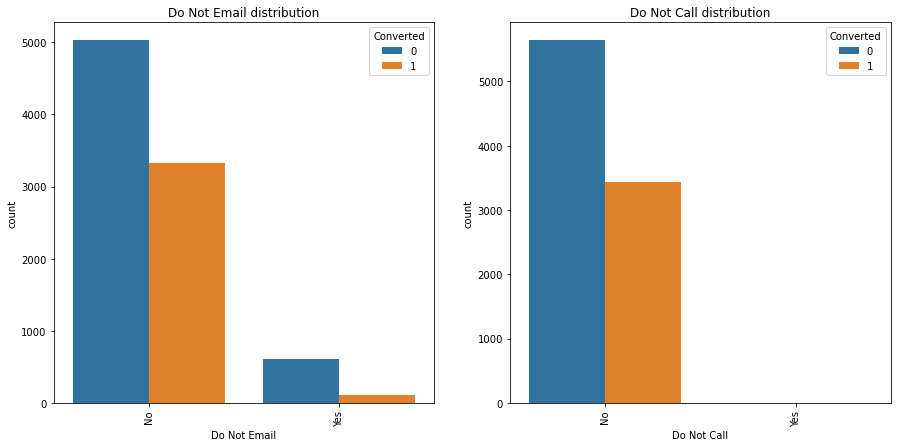

In [53]:
#Visualizing Do not Email and Do not Call with target variable

plt.figure(figsize=(15,7))
ax1=plt.subplot(1, 2, 1)
sns.countplot(x='Do Not Email',hue='Converted',data=lead_data)
plt.xticks(rotation=90)
plt.title('Do Not Email distribution')

ax1=plt.subplot(1, 2, 2)
sns.countplot(x='Do Not Call',hue='Converted',data=lead_data)
plt.xticks(rotation=90)
plt.title('Do Not Call distribution')
plt.show()

People opted for Do not call/Do not Email as No have higher rate of conversion

In [54]:
# since 99% of the data is No, we can drop this column
lead_data['Do Not Call'].value_counts(normalize=True)

No     0.99978
Yes    0.00022
Name: Do Not Call, dtype: float64

In [55]:
# Dropping Do Not Call
lead_data = lead_data.drop(['Do Not Call'],axis=1)
lead_data.shape

(9074, 29)

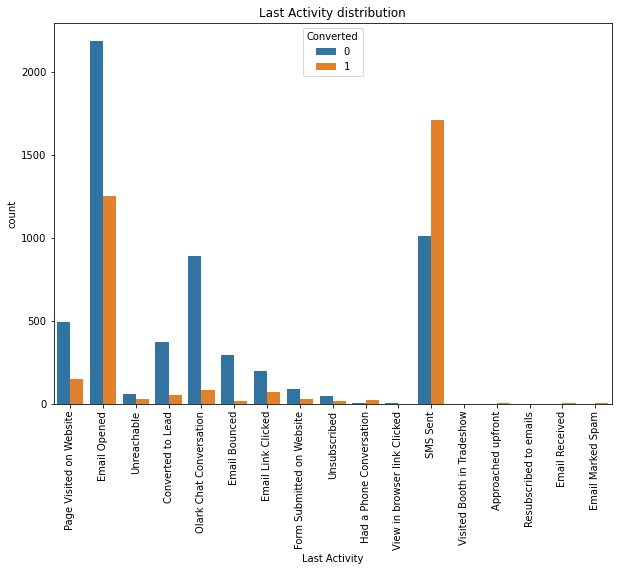

In [56]:
#Visualizing Last Activity with target variable

plt.figure(figsize=(10,7))
sns.countplot(x='Last Activity',hue='Converted',data=lead_data)
plt.xticks(rotation=90)
plt.title('Last Activity distribution')
plt.show()

In [57]:
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','View in browser link Clicked','Approached upfront','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Other_Last_Activity')
lead_data['Last Activity'].value_counts(dropna=False)

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Other_Last_Activity           191
Form Submitted on Website     116
Name: Last Activity, dtype: int64

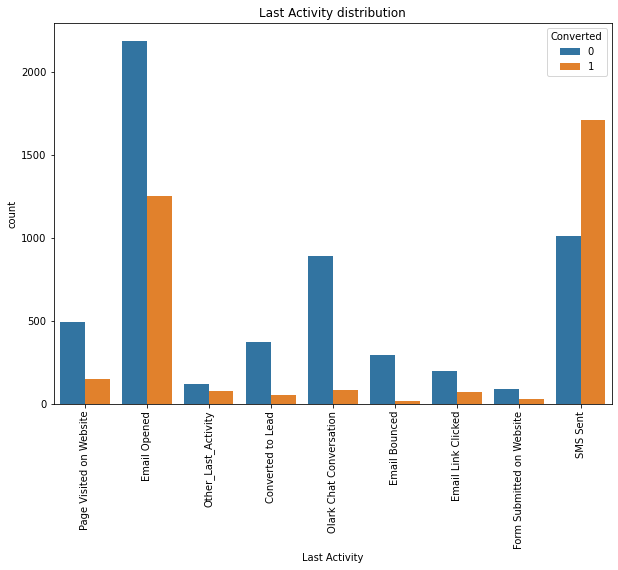

In [58]:
#Visualizing Last Activity with target variable

plt.figure(figsize=(10,7))
sns.countplot(x='Last Activity',hue='Converted',data=lead_data)
plt.xticks(rotation=90)
plt.title('Last Activity distribution')
plt.show()

SMS sent has higher conversion rate

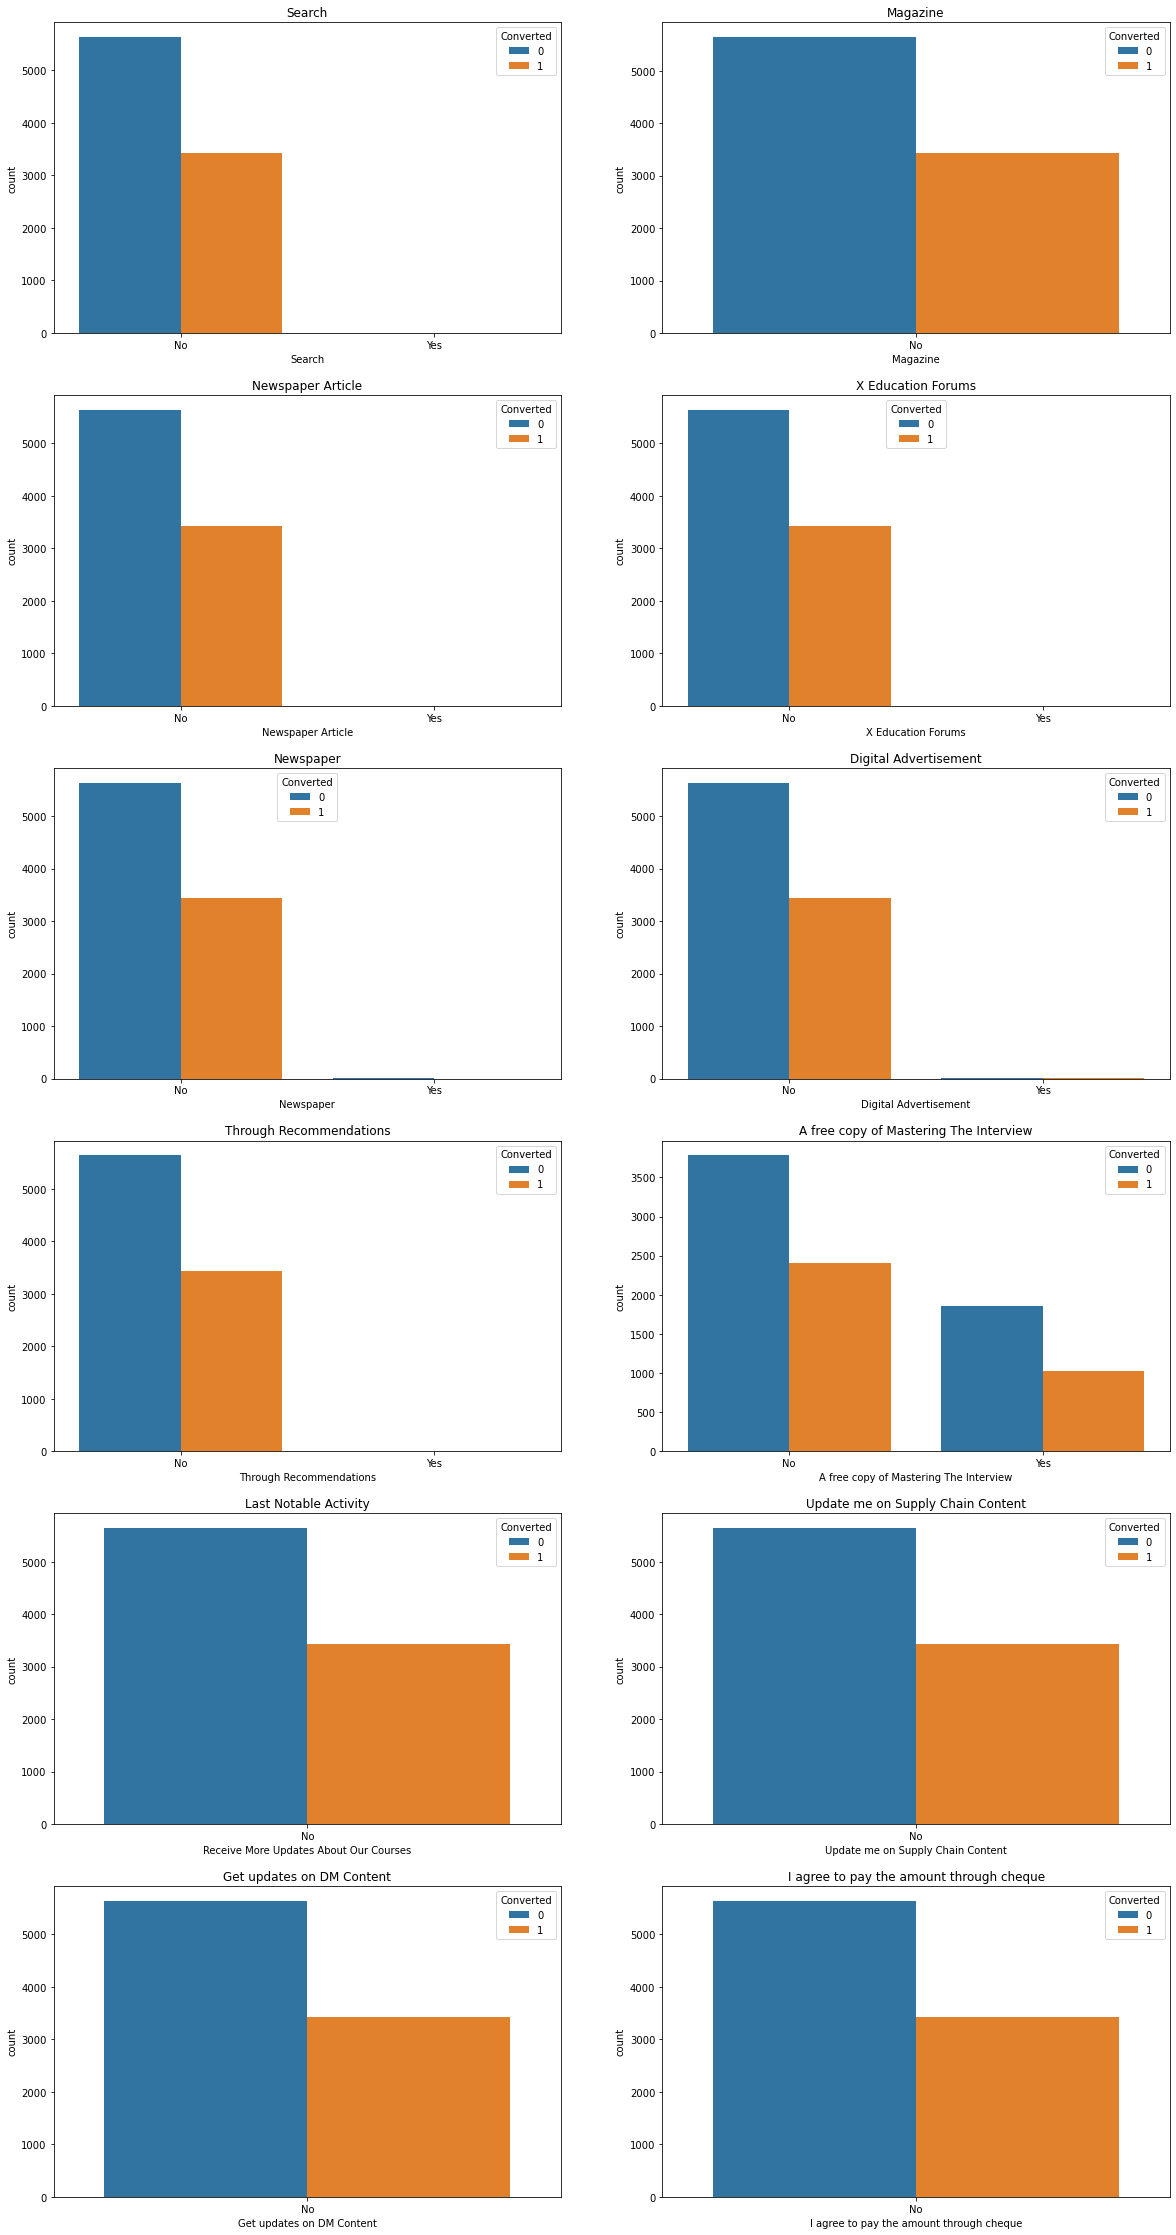

In [59]:
#Visualizing other columns for distribution
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(x='Search',hue='Converted',data=lead_data)
plt.title('Search')

plt.subplot(6,2,2)
sns.countplot(x='Magazine',hue='Converted',data=lead_data)
plt.title('Magazine')

plt.subplot(6,2,3)
sns.countplot(x='Newspaper Article',hue='Converted',data=lead_data)
plt.title('Newspaper Article')

plt.subplot(6,2,4)
sns.countplot(x='X Education Forums',hue='Converted',data=lead_data)
plt.title('X Education Forums')

plt.subplot(6,2,5)
sns.countplot(x='Newspaper',hue='Converted',data=lead_data)
plt.title('Newspaper')

plt.subplot(6,2,6)
sns.countplot(x='Digital Advertisement',hue='Converted',data=lead_data)
plt.title('Digital Advertisement')

plt.subplot(6,2,7)
sns.countplot(x='Through Recommendations',hue='Converted',data=lead_data)
plt.title('Through Recommendations')

plt.subplot(6,2,8)
sns.countplot(x='A free copy of Mastering The Interview',hue='Converted',data=lead_data)
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,9)
sns.countplot(x='Receive More Updates About Our Courses',hue='Converted',data=lead_data)
plt.title('Last Notable Activity')

plt.subplot(6,2,10)
sns.countplot(x='Update me on Supply Chain Content',hue='Converted',data=lead_data)
plt.title('Update me on Supply Chain Content')

plt.subplot(6,2,11)
sns.countplot(x='Get updates on DM Content',hue='Converted',data=lead_data)
plt.title('Get updates on DM Content')

plt.subplot(6,2,12)
sns.countplot(x='I agree to pay the amount through cheque',hue='Converted',data=lead_data)
plt.title('I agree to pay the amount through cheque')

plt.show()

Al these columns do not have meaning full category which can hep us in identifying the driving conversion rate. droping these columns

In [60]:
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [61]:
# dropping these columns from dataset
lead_data = lead_data.drop(['Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content',
         'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview'],axis=1)
lead_data.shape

(9074, 17)

In [62]:
# Reviewing Tags data
lead_data['Tags'].value_counts(dropna=False)

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [63]:
# Grouping categories into one comman tag

lead_data['Tags'] = lead_data['Tags'].replace(['Interested in other courses','Interested  in full time MBA','Interested in Next batch','Shall take in the next coming month'],'Interested in other courses_batch')

lead_data['Tags'] = lead_data['Tags'].replace(['switched off', 'Busy', 'Lost to EINS','Not doing further education', 'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)','wrong number given', 'opp hangup', 'number not provided', 'in touch with EINS', 'Lost to Others', 'Still Thinking', 'Want to take admission but has financial problems', 'In confusion whether part time or DLP', 'Lateral student', 'University not recognized', 'Recognition issue (DEC approval)'],'Other_Tags')

lead_data['Tags'].value_counts(dropna=False)


Will revert after reading the email    5343
Ringing                                1187
Other_Tags                             1146
Interested in other courses_batch       632
Already a student                       465
Closed by Horizzon                      301
Name: Tags, dtype: int64

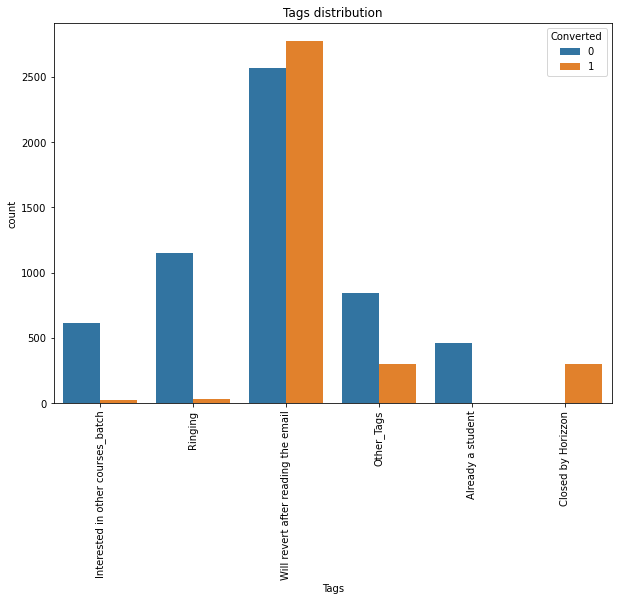

In [64]:
#Visualizing Tags with target variable

plt.figure(figsize=(10,7))
sns.countplot(x='Tags',hue='Converted',data=lead_data)
plt.xticks(rotation=90)
plt.title('Tags distribution')
plt.show()


Will revert after reading the email has higher conversion rate

In [65]:
# reviewing Last Notabe Activity

lead_data['Last Notable Activity'].value_counts(dropna=False)

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [66]:
# Group below groups into Others_Last_Notable_Activity

lead_data['Last Notable Activity']=lead_data['Last Notable Activity'].replace(['Email Link Clicked','Email Bounced', 'Unsubscribed', 'Unreachable', 'Had a Phone Conversation', 'Email Marked Spam', 'Approached upfront', 'Resubscribed to emails', 'View in browser link Clicked', 'Form Submitted on Website', 'Email Received'], 'Others_Last_Notable_Activity')

lead_data['Last Notable Activity'].value_counts(dropna=False)

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Others_Last_Notable_Activity     331
Page Visited on Website          318
Olark Chat Conversation          183
Name: Last Notable Activity, dtype: int64

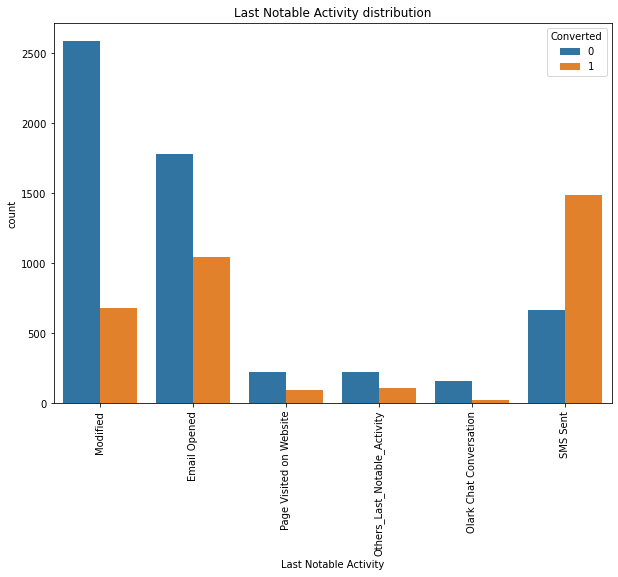

In [67]:
#Visualizing Last Notable Activity with target variable

plt.figure(figsize=(10,7))
sns.countplot(x='Last Notable Activity',hue='Converted',data=lead_data)
plt.xticks(rotation=90)
plt.title('Last Notable Activity distribution')
plt.show()

SMS sent has higher conversion rate

In [68]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

# Numerical Data Analysis:

In [69]:
lead_data.select_dtypes(include=['int64','float64']).columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

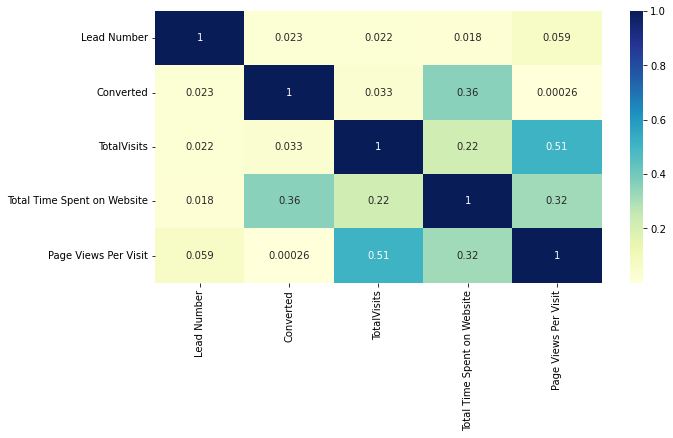

In [70]:
# Reviewing correlation of numerical variables
plt.figure(figsize=(10,5))
sns.heatmap(lead_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

Total time spent on website has correlation with Converted compared to other variables
Total time spent on website and Page views per visit are correlated

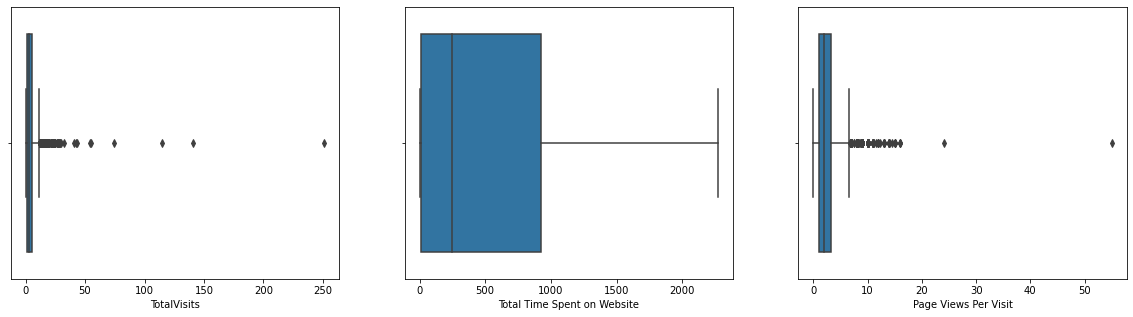

In [71]:
# reviewing using box plot distribution of numerical variables

#plot the boxplot
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
sns.boxplot(lead_data.TotalVisits)
plt.subplot(1,3,2)
sns.boxplot(lead_data['Total Time Spent on Website'])
plt.subplot(1,3,3)
sns.boxplot(lead_data['Page Views Per Visit'])
plt.show()

Tota visits has outlier an require aditional review.
Page Views per visit need to be reviewed

In [72]:
lead_data.shape

(9074, 17)

In [73]:
# Reviewing Total Time Spent on Website

lead_data['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
5%          0.000000
25%        11.000000
50%       246.000000
75%       922.750000
90%      1373.000000
95%      1557.000000
99%      1839.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

Total time spent does not include major Outliers. Hence no need of additional treatment.

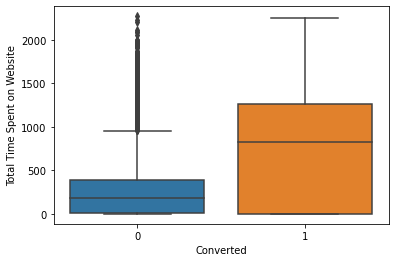

In [74]:
#Visualizing Spread of Total Time Spent on Website with Converted variable
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data)
plt.show()

People spending more time in website have a high rate of conversion

In [75]:
# Reviewing TotalVisits for outlier
lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

There is a big gap between minimum and maximum visit. We can observe above 95% the visits are anomalies. Hence, removing the data above 95% and below 5%


In [76]:
#Outlier treatment
Q3 = lead_data.TotalVisits.quantile(0.95)
lead_data = lead_data[(lead_data.TotalVisits <= Q3)]
Q1 = lead_data.TotalVisits.quantile(0.05)
lead_data = lead_data[(lead_data.TotalVisits >= Q1)]
lead_data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8721.000000
mean        2.916294
std         2.468306
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         4.000000
90%         6.000000
95%         8.000000
99%        10.000000
max        10.000000
Name: TotalVisits, dtype: float64

In [77]:
lead_data.shape

(8721, 17)

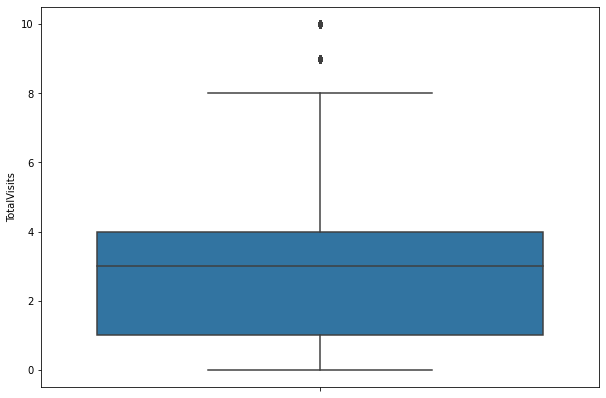

In [78]:
# Reviewiing the data again through box plot
plt.figure(figsize=(10,7))
sns.boxplot(y=lead_data['TotalVisits'])
plt.show()

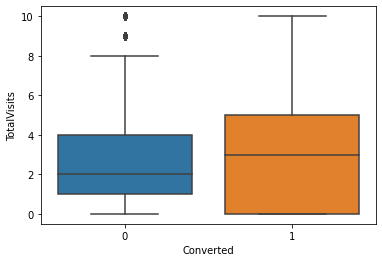

In [79]:
#Visualizing Spread of "Total Visits" with Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data)
plt.show()

People visiting the website more frequently have a high chance of converting into Lead

In [80]:
# Reviewing Page Views per visit

lead_data['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8721.000000
mean        2.255668
std         1.922397
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         8.000000
max        10.000000
Name: Page Views Per Visit, dtype: float64

In [81]:
#Outlier treatment - removing top 1% and bttm 1%
Q3 = lead_data['Page Views Per Visit'].quantile(0.99)
lead_data = lead_data[(lead_data['Page Views Per Visit'] <= Q3)]
Q1 = lead_data['Page Views Per Visit'].quantile(0.01)
lead_data = lead_data[(lead_data['Page Views Per Visit'] >= Q1)]
lead_data['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8653.000000
mean        2.200009
std         1.823608
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

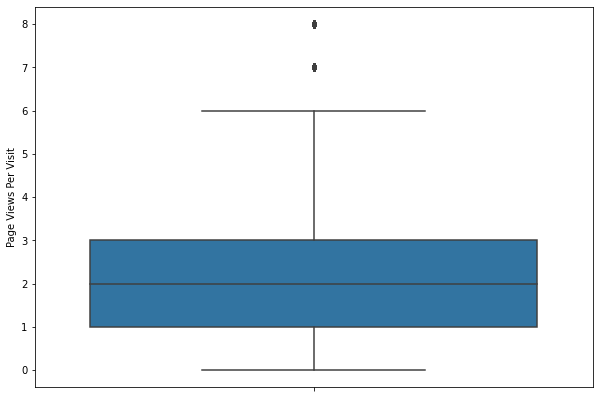

In [82]:
# Reviewiing the data again through box plot
plt.figure(figsize=(10,7))
sns.boxplot(y=lead_data['Page Views Per Visit'])
plt.show()

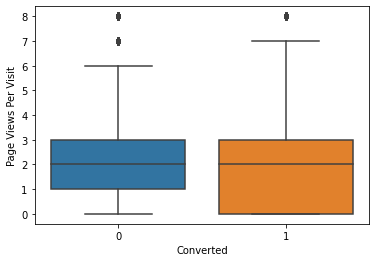

In [83]:
#Visualizing Spread of 'Page Views Per Visit' with Converted variable
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_data)
plt.show()

Median is same for both the coategories

In [84]:
lead_data.shape

(8653, 17)

In [85]:
# Checking the columns
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8653 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    8653 non-null   object 
 1   Lead Number                                    8653 non-null   int64  
 2   Lead Origin                                    8653 non-null   object 
 3   Lead Source                                    8653 non-null   object 
 4   Do Not Email                                   8653 non-null   object 
 5   Converted                                      8653 non-null   int64  
 6   TotalVisits                                    8653 non-null   float64
 7   Total Time Spent on Website                    8653 non-null   int64  
 8   Page Views Per Visit                           8653 non-null   float64
 9   Last Activity                                  8653 

In [86]:
# drop Prospect_ID and Lead Number from the dataset for next set of analysis

lead_data_new = lead_data.drop(['Prospect ID','Lead Number'],1)
lead_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8653 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8653 non-null   object 
 1   Lead Source                                    8653 non-null   object 
 2   Do Not Email                                   8653 non-null   object 
 3   Converted                                      8653 non-null   int64  
 4   TotalVisits                                    8653 non-null   float64
 5   Total Time Spent on Website                    8653 non-null   int64  
 6   Page Views Per Visit                           8653 non-null   float64
 7   Last Activity                                  8653 non-null   object 
 8   Country                                        8653 non-null   object 
 9   Specialization                                 8653 

In [87]:
lead_data_new.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [88]:
lead_data_new.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,India,Not Specified_Specialization,Unemployed,Better Career Prospects,Interested in other courses_batch,Mumbai,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Not Specified_Specialization,Unemployed,Better Career Prospects,Ringing,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Other_Last_Activity,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Not Specified_Specialization,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,Modified


# Step 3 Data Preparation - crate dummay variables

In [89]:
# Converting variables with Yes or No response as binary

binary_map_lst =  ['Do Not Email']

# function to map to binary
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list
lead_data_new[binary_map_lst]= lead_data_new[binary_map_lst].apply(binary_map)
lead_data_new.shape

(8653, 15)

In [90]:
lead_data_new.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,Not Specified_Specialization,Unemployed,Better Career Prospects,Interested in other courses_batch,Mumbai,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Not Specified_Specialization,Unemployed,Better Career Prospects,Ringing,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other_Last_Activity,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Not Specified_Specialization,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,Modified


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [91]:
lead_data_new.select_dtypes(include=['object']).columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [92]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data_new[['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
lead_data_new = pd.concat([lead_data_new, dummy1], axis=1)

lead_data_new.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Last_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Outside India,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Not Specified_Specialization,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Closed by Horizzon,Tags_Interested in other courses_batch,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,Not Specified_Specialization,Unemployed,Better Career Prospects,Interested in other courses_batch,Mumbai,Modified,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Not Specified_Specialization,Unemployed,Better Career Prospects,Ringing,Mumbai,Email Opened,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other_Last_Activity,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Not Specified_Specialization,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [93]:
lead_data_new.shape

(8653, 62)

In [94]:
lead_data_new = lead_data_new.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'Last Notable Activity'],axis=1)
lead_data_new.shape

(8653, 52)

# Step 4 Splitting data into train and test set

In [95]:
# importing library
#from sklearn.model_selection import train_test_split

In [96]:
# Putting target variable to y
y = lead_data_new['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [97]:
# removing target variable from x
X=lead_data_new.drop('Converted', axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Last_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Outside India,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Not Specified_Specialization,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Closed by Horizzon,Tags_Interested in other courses_batch,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [98]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [99]:
X_train.shape

(6057, 51)

In [100]:
X_test.shape

(2596, 51)

In [101]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6057 entries, 4556 to 6032
Data columns (total 51 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             6057 non-null   int64  
 1   TotalVisits                                                              6057 non-null   float64
 2   Total Time Spent on Website                                              6057 non-null   int64  
 3   Page Views Per Visit                                                     6057 non-null   float64
 4   Lead Origin_Landing Page Submission                                      6057 non-null   uint8  
 5   Lead Origin_Lead Add Form                                                6057 non-null   uint8  
 6   Lead Origin_Lead Import                                              

# Step 5 Scaling the feature/variables

In [102]:
#from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Last_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Outside India,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Not Specified_Specialization,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Closed by Horizzon,Tags_Interested in other courses_batch,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
4556,0,0.047609,1.461213,0.436889,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
2586,0,-1.191792,-0.873461,-1.210458,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
8038,0,1.287010,0.451972,-0.386784,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
5821,1,-0.365525,-0.549916,-0.112226,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
5499,1,2.526412,1.499818,0.436889,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


# Step 6 Feature Selection

In [104]:
#from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#from sklearn.feature_selection import RFE
rfe = RFE(logreg, step =15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [105]:
rfe.support_

array([ True, False,  True, False,  True,  True, False, False,  True,
       False, False,  True, False,  True, False, False,  True, False,
        True,  True, False,  True,  True, False, False, False, False,
       False,  True, False, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True, False,  True])

In [106]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Other_Lead_Source', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Social Media', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 2),
 ('Last Activity_Email Link Clicked', False, 3),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 3),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Last_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 3),
 ('Last Activity_SMS Sent', True, 1),
 ('Country_Outside India', True, 1),
 ('Specialization_Business

In [107]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Last_Activity', 'Last Activity_SMS Sent',
       'Country_Outside India', 'Specialization_Not Specified_Specialization',
       'What is your current occupation_Other_Occupation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Flexibility & Convenience',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses_batch',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Others_Last_Notable_Activity',
       'La

In [108]:
col.shape

(25,)

In [109]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Other_Lead_Source', 'Lead Source_Social Media',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_International Business',
       'Specialization_Management_Specialization',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'What matters most to you in choosing a course_Other',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Nota

In [110]:
X_train.shape

(6057, 51)

# Step 7 - Building Model

Assessing the model with StatsModels

# Model 1

In [111]:
#import statsmodels.api as sm

In [112]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6057
Model:                            GLM   Df Residuals:                     6031
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1419.7
Date:                Tue, 15 Nov 2022   Deviance:                       2839.5
Time:                        00:12:08   Pearson chi2:                 1.01e+04
No. Iterations:                    19   Pseudo R-squ. (CS):             0.5748
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -8.5513      0.777    -11.005      0.000     -10.074      -7.028
Do Not Email                                                               -1.6292      0.228     -7.133      0.000      -2.077      -1.182
Total Time Spent on Website                                                 1.0669      0.056     19.111      0.000       0.957       1.176
Lead Origin_Landing Page Submission                                        -0.6311      0.185     -3.412      0.001      -0.994      -0.269
Lead Origin_Lead Add Form                                                   0.6605      1.562      0.423      0.673      -2.402       3.723
Lead Source_Olark Chat                                                      0.8814      0.168      5.258      0.000       0.553       1.210
Lead Source_Reference                                                       1.7770      1.598      1.112      0.266      -1.355       4.910
Lead Source_Welingak Website                                                2.9341      1.730      1.696      0.090      -0.456       6.324
Last Activity_Email Opened                                                  0.8109      0.160      5.061      0.000       0.497       1.125
Last Activity_Olark Chat Conversation                                      -0.6680      0.246     -2.720      0.007      -1.149      -0.187
Last Activity_Other_Last_Activity                                           1.0024      0.368      2.725      0.006       0.282       1.723
Last Activity_SMS Sent                                                      1.3193      0.217      6.084      0.000       0.894       1.744
Country_Outside India                                                      -0.4272      0.278     -1.538      0.124      -0.972       0.117
Specialization_Not Specified_Specialization                                -0.8688      0.176     -4.945      0.000      -1.213      -0.524
What is your current occupation_Other_Occupation                            2.9205      0.766      3.811      0.000       1.419       4.422
What is your current occupation_Student                                     3.5941      0.428      8.402      0.000       2.756       4.433
What is your current occupation_Unemployed                                  3.2247      0.126     25.605      0.000       2.978       3.472
What is your current occupation_Working Professional                        4.4712      0.284     15.762      0.000       3.915       5.027
What matters most to you in choosing a course_Flexibility & Convenience    21.3784   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Tag

In [113]:
# Dropping the column What matters most to you in choosing a course_Flexibility & Convenience due to high pvalue
col1 = col.drop('What matters most to you in choosing a course_Flexibility & Convenience')

# Model 2

In [114]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6057
Model:                            GLM   Df Residuals:                     6032
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1420.9
Date:                Tue, 15 Nov 2022   Deviance:                       2841.8
Time:                        00:12:09   Pearson chi2:                 1.01e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5746
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -8.5419      0.777    -10.992      0.000     -10.065      -7.019
Do Not Email                                            -1.6279      0.228     -7.130      0.000      -2.075      -1.180
Total Time Spent on Website                              1.0664      0.056     19.105      0.000       0.957       1.176
Lead Origin_Landing Page Submission                     -0.6446      0.185     -3.487      0.000      -1.007      -0.282
Lead Origin_Lead Add Form                                0.6434      1.560      0.412      0.680      -2.415       3.701
Lead Source_Olark Chat                                   0.8902      0.168      5.314      0.000       0.562       1.218
Lead Source_Reference                                    1.7877      1.596      1.120      0.263      -1.341       4.916
Lead Source_Welingak Website                             2.9512      1.728      1.708      0.088      -0.435       6.337
Last Activity_Email Opened                               0.8138      0.160      5.081      0.000       0.500       1.128
Last Activity_Olark Chat Conversation                   -0.6711      0.246     -2.733      0.006      -1.152      -0.190
Last Activity_Other_Last_Activity                        1.0035      0.368      2.730      0.006       0.283       1.724
Last Activity_SMS Sent                                   1.3190      0.217      6.083      0.000       0.894       1.744
Country_Outside India                                   -0.4294      0.278     -1.546      0.122      -0.974       0.115
Specialization_Not Specified_Specialization             -0.8850      0.176     -5.043      0.000      -1.229      -0.541
What is your current occupation_Other_Occupation         2.9167      0.767      3.804      0.000       1.414       4.420
What is your current occupation_Student                  3.5973      0.428      8.406      0.000       2.758       4.436
What is your current occupation_Unemployed               3.2236      0.126     25.603      0.000       2.977       3.470
What is your current occupation_Working Professional     4.4678      0.284     15.751      0.000       3.912       5.024
Tags_Closed by Horizzon                                  9.5796      1.249      7.668      0.000       7.131      12.028
Tags_Interested in other courses_batch                   1.5014      0.781      1.923      0.054      -0.029       3.032
Tags_Other_Tags                                          3.7644      0.738      5.099      0.000       2.318       5.211
Tags_Ringing                                             0.5254      0.764      0.688      0.492      -0.972       2.022
Tags_Will revert after reading the email                 6

In [115]:
# droping Lead Origin_Lead Add Form due to high pvalue
col1 = col1.drop('Lead Origin_Lead Add Form')

# Model 3

In [116]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6057
Model:                            GLM   Df Residuals:                     6033
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1421.0
Date:                Tue, 15 Nov 2022   Deviance:                       2842.0
Time:                        00:12:09   Pearson chi2:                 1.01e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5746
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -8.5339      0.777    -10.985      0.000     -10.057      -7.011
Do Not Email                                            -1.6278      0.228     -7.130      0.000      -2.075      -1.180
Total Time Spent on Website                              1.0655      0.056     19.106      0.000       0.956       1.175
Lead Origin_Landing Page Submission                     -0.6529      0.184     -3.552      0.000      -1.013      -0.293
Lead Source_Olark Chat                                   0.8863      0.167      5.300      0.000       0.559       1.214
Lead Source_Reference                                    2.4248      0.399      6.076      0.000       1.643       3.207
Lead Source_Welingak Website                             3.5908      0.760      4.722      0.000       2.100       5.081
Last Activity_Email Opened                               0.8137      0.160      5.083      0.000       0.500       1.127
Last Activity_Olark Chat Conversation                   -0.6723      0.245     -2.739      0.006      -1.153      -0.191
Last Activity_Other_Last_Activity                        1.0029      0.368      2.728      0.006       0.282       1.723
Last Activity_SMS Sent                                   1.3180      0.217      6.079      0.000       0.893       1.743
Country_Outside India                                   -0.4303      0.278     -1.550      0.121      -0.975       0.114
Specialization_Not Specified_Specialization             -0.8916      0.175     -5.099      0.000      -1.234      -0.549
What is your current occupation_Other_Occupation         2.9159      0.767      3.802      0.000       1.413       4.419
What is your current occupation_Student                  3.5988      0.428      8.407      0.000       2.760       4.438
What is your current occupation_Unemployed               3.2244      0.126     25.611      0.000       2.978       3.471
What is your current occupation_Working Professional     4.4667      0.284     15.744      0.000       3.911       5.023
Tags_Closed by Horizzon                                  9.5809      1.249      7.669      0.000       7.132      12.029
Tags_Interested in other courses_batch                   1.5003      0.781      1.922      0.055      -0.030       3.030
Tags_Other_Tags                                          3.7654      0.738      5.101      0.000       2.319       5.212
Tags_Ringing                                             0.5263      0.764      0.689      0.491      -0.971       2.023
Tags_Will revert after reading the email                 6.2723      0.735      8.530      0.000       4.831       7.713
Last Notable Activity_Others_Last_Notable_Activity       0

# checking VIF

In [117]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,Tags_Will revert after reading the email,7.27
9,Last Activity_SMS Sent,6.48
2,Lead Origin_Landing Page Submission,5.39
22,Last Notable Activity_SMS Sent,4.95
14,What is your current occupation_Unemployed,4.18
11,Specialization_Not Specified_Specialization,3.86
6,Last Activity_Email Opened,3.34
19,Tags_Ringing,2.71
18,Tags_Other_Tags,2.48
3,Lead Source_Olark Chat,2.43


In [118]:
# Dropping Tags_Ringing since this variable has high pvalue
col1 = col1.drop('Tags_Ringing')

# Model 4

In [119]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6057
Model:                            GLM   Df Residuals:                     6034
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1421.3
Date:                Tue, 15 Nov 2022   Deviance:                       2842.5
Time:                        00:12:10   Pearson chi2:                 1.01e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5746
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -8.0668      0.348    -23.190      0.000      -8.749      -7.385
Do Not Email                                            -1.6288      0.228     -7.131      0.000      -2.076      -1.181
Total Time Spent on Website                              1.0650      0.056     19.111      0.000       0.956       1.174
Lead Origin_Landing Page Submission                     -0.6503      0.184     -3.539      0.000      -1.010      -0.290
Lead Source_Olark Chat                                   0.8843      0.167      5.290      0.000       0.557       1.212
Lead Source_Reference                                    2.4348      0.401      6.078      0.000       1.650       3.220
Lead Source_Welingak Website                             3.5895      0.761      4.720      0.000       2.099       5.080
Last Activity_Email Opened                               0.8106      0.160      5.070      0.000       0.497       1.124
Last Activity_Olark Chat Conversation                   -0.6726      0.245     -2.741      0.006      -1.153      -0.192
Last Activity_Other_Last_Activity                        1.0048      0.368      2.732      0.006       0.284       1.726
Last Activity_SMS Sent                                   1.3190      0.217      6.085      0.000       0.894       1.744
Country_Outside India                                   -0.4289      0.278     -1.544      0.123      -0.973       0.116
Specialization_Not Specified_Specialization             -0.8897      0.175     -5.091      0.000      -1.232      -0.547
What is your current occupation_Other_Occupation         2.9181      0.767      3.805      0.000       1.415       4.421
What is your current occupation_Student                  3.5595      0.419      8.503      0.000       2.739       4.380
What is your current occupation_Unemployed               3.2265      0.126     25.623      0.000       2.980       3.473
What is your current occupation_Working Professional     4.4670      0.284     15.747      0.000       3.911       5.023
Tags_Closed by Horizzon                                  9.1103      1.036      8.796      0.000       7.080      11.140
Tags_Interested in other courses_batch                   1.0318      0.354      2.916      0.004       0.338       1.725
Tags_Other_Tags                                          3.2930      0.233     14.157      0.000       2.837       3.749
Tags_Will revert after reading the email                 5.8027      0.233     24.899      0.000       5.346       6.259
Last Notable Activity_Others_Last_Notable_Activity       0.7813      0.283      2.762      0.006       0.227       1.336
Last Notable Activity_SMS Sent                           1

In [120]:
# checking VIF

In [121]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_SMS Sent,6.29
21,Last Notable Activity_SMS Sent,4.94
2,Lead Origin_Landing Page Submission,4.34
19,Tags_Will revert after reading the email,4.16
14,What is your current occupation_Unemployed,3.74
11,Specialization_Not Specified_Specialization,3.35
6,Last Activity_Email Opened,3.11
3,Lead Source_Olark Chat,2.42
7,Last Activity_Olark Chat Conversation,1.94
4,Lead Source_Reference,1.69


In [122]:
# dropping Last Activity_SMS Sent due to high vif
col1 = col1.drop('Last Activity_SMS Sent')

# Model 5

In [123]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6057
Model:                            GLM   Df Residuals:                     6035
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1439.7
Date:                Tue, 15 Nov 2022   Deviance:                       2879.4
Time:                        00:12:11   Pearson chi2:                 9.21e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5720
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.5002      0.327    -22.942      0.000      -8.141      -6.859
Do Not Email                                            -1.6723      0.222     -7.535      0.000      -2.107      -1.237
Total Time Spent on Website                              1.0689      0.055     19.351      0.000       0.961       1.177
Lead Origin_Landing Page Submission                     -0.6742      0.181     -3.718      0.000      -1.030      -0.319
Lead Source_Olark Chat                                   0.9000      0.165      5.445      0.000       0.576       1.224
Lead Source_Reference                                    2.6461      0.397      6.657      0.000       1.867       3.425
Lead Source_Welingak Website                             3.8830      0.773      5.022      0.000       2.368       5.398
Last Activity_Email Opened                               0.3150      0.132      2.395      0.017       0.057       0.573
Last Activity_Olark Chat Conversation                   -1.1685      0.227     -5.140      0.000      -1.614      -0.723
Last Activity_Other_Last_Activity                        0.7415      0.359      2.068      0.039       0.039       1.444
Country_Outside India                                   -0.4297      0.275     -1.561      0.119      -0.969       0.110
Specialization_Not Specified_Specialization             -0.9044      0.172     -5.245      0.000      -1.242      -0.566
What is your current occupation_Other_Occupation         2.6647      0.728      3.661      0.000       1.238       4.091
What is your current occupation_Student                  3.3484      0.408      8.208      0.000       2.549       4.148
What is your current occupation_Unemployed               3.1610      0.124     25.570      0.000       2.919       3.403
What is your current occupation_Working Professional     4.3949      0.283     15.547      0.000       3.841       4.949
Tags_Closed by Horizzon                                  9.1193      1.036      8.799      0.000       7.088      11.151
Tags_Interested in other courses_batch                   0.9957      0.352      2.827      0.005       0.305       1.686
Tags_Other_Tags                                          3.2883      0.233     14.134      0.000       2.832       3.744
Tags_Will revert after reading the email                 5.7847      0.233     24.846      0.000       5.328       6.241
Last Notable Activity_Others_Last_Notable_Activity       0.3623      0.268      1.351      0.177      -0.163       0.888
Last Notable Activity_SMS Sent                           2.0528      0.145     14.179      0.000       1.769       2.337
==========================================================

In [124]:
# Checking VIF

In [125]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,4.15
18,Tags_Will revert after reading the email,3.98
13,What is your current occupation_Unemployed,3.68
10,Specialization_Not Specified_Specialization,3.27
6,Last Activity_Email Opened,2.62
3,Lead Source_Olark Chat,2.41
20,Last Notable Activity_SMS Sent,2.32
7,Last Activity_Olark Chat Conversation,1.80
4,Lead Source_Reference,1.68
17,Tags_Other_Tags,1.56


In [126]:
# Dropping the column  Country_Outside India because it has high pvalue
col1 = col1.drop('Country_Outside India')

# Model 6

In [127]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6057
Model:                            GLM   Df Residuals:                     6036
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1441.0
Date:                Tue, 15 Nov 2022   Deviance:                       2881.9
Time:                        00:12:13   Pearson chi2:                 9.31e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5718
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.5137      0.327    -22.990      0.000      -8.154      -6.873
Do Not Email                                            -1.6870      0.222     -7.608      0.000      -2.122      -1.252
Total Time Spent on Website                              1.0691      0.055     19.362      0.000       0.961       1.177
Lead Origin_Landing Page Submission                     -0.6763      0.181     -3.731      0.000      -1.032      -0.321
Lead Source_Olark Chat                                   0.9053      0.165      5.477      0.000       0.581       1.229
Lead Source_Reference                                    2.6612      0.397      6.702      0.000       1.883       3.439
Lead Source_Welingak Website                             3.8966      0.773      5.039      0.000       2.381       5.412
Last Activity_Email Opened                               0.3138      0.132      2.385      0.017       0.056       0.572
Last Activity_Olark Chat Conversation                   -1.1686      0.227     -5.144      0.000      -1.614      -0.723
Last Activity_Other_Last_Activity                        0.7471      0.359      2.082      0.037       0.044       1.450
Specialization_Not Specified_Specialization             -0.8954      0.172     -5.199      0.000      -1.233      -0.558
What is your current occupation_Other_Occupation         2.6805      0.729      3.678      0.000       1.252       4.109
What is your current occupation_Student                  3.3503      0.409      8.193      0.000       2.549       4.152
What is your current occupation_Unemployed               3.1633      0.124     25.596      0.000       2.921       3.405
What is your current occupation_Working Professional     4.3835      0.282     15.529      0.000       3.830       4.937
Tags_Closed by Horizzon                                  9.1193      1.037      8.798      0.000       7.088      11.151
Tags_Interested in other courses_batch                   1.0022      0.352      2.847      0.004       0.312       1.692
Tags_Other_Tags                                          3.2760      0.232     14.093      0.000       2.820       3.732
Tags_Will revert after reading the email                 5.7833      0.233     24.843      0.000       5.327       6.240
Last Notable Activity_Others_Last_Notable_Activity       0.3627      0.268      1.353      0.176      -0.163       0.888
Last Notable Activity_SMS Sent                           2.0500      0.145     14.167      0.000       1.766       2.334
========================================================================================================================
"""

# checking vif

In [128]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,4.13
17,Tags_Will revert after reading the email,3.98
12,What is your current occupation_Unemployed,3.68
9,Specialization_Not Specified_Specialization,3.27
6,Last Activity_Email Opened,2.62
3,Lead Source_Olark Chat,2.41
19,Last Notable Activity_SMS Sent,2.32
7,Last Activity_Olark Chat Conversation,1.80
4,Lead Source_Reference,1.68
16,Tags_Other_Tags,1.56


In [129]:
# dropping Last Notable Activity_Others_Last_Notable_Activity due to high pvalue
col1 = col1.drop('Last Notable Activity_Others_Last_Notable_Activity')

# Model 7

In [130]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6057
Model:                            GLM   Df Residuals:                     6037
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1441.9
Date:                Tue, 15 Nov 2022   Deviance:                       2883.7
Time:                        00:12:13   Pearson chi2:                 9.19e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5716
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.4665      0.324    -23.029      0.000      -8.102      -6.831
Do Not Email                                            -1.6441      0.218     -7.528      0.000      -2.072      -1.216
Total Time Spent on Website                              1.0686      0.055     19.374      0.000       0.961       1.177
Lead Origin_Landing Page Submission                     -0.6845      0.181     -3.780      0.000      -1.039      -0.330
Lead Source_Olark Chat                                   0.9211      0.165      5.582      0.000       0.598       1.244
Lead Source_Reference                                    2.6482      0.397      6.674      0.000       1.871       3.426
Lead Source_Welingak Website                             3.8904      0.772      5.037      0.000       2.377       5.404
Last Activity_Email Opened                               0.2711      0.127      2.126      0.033       0.021       0.521
Last Activity_Olark Chat Conversation                   -1.2194      0.224     -5.444      0.000      -1.658      -0.780
Last Activity_Other_Last_Activity                        0.8738      0.343      2.547      0.011       0.202       1.546
Specialization_Not Specified_Specialization             -0.9023      0.172     -5.242      0.000      -1.240      -0.565
What is your current occupation_Other_Occupation         2.6697      0.723      3.694      0.000       1.253       4.086
What is your current occupation_Student                  3.3312      0.408      8.157      0.000       2.531       4.132
What is your current occupation_Unemployed               3.1640      0.124     25.599      0.000       2.922       3.406
What is your current occupation_Working Professional     4.3813      0.282     15.559      0.000       3.829       4.933
Tags_Closed by Horizzon                                  9.1289      1.037      8.805      0.000       7.097      11.161
Tags_Interested in other courses_batch                   0.9940      0.352      2.826      0.005       0.304       1.683
Tags_Other_Tags                                          3.2734      0.232     14.090      0.000       2.818       3.729
Tags_Will revert after reading the email                 5.7832      0.233     24.856      0.000       5.327       6.239
Last Notable Activity_SMS Sent                           2.0057      0.141     14.273      0.000       1.730       2.281
========================================================================================================================
"""

In [131]:
# checking vif

In [132]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,Lead Origin_Landing Page Submission,4.12
17,Tags_Will revert after reading the email,3.94
12,What is your current occupation_Unemployed,3.65
9,Specialization_Not Specified_Specialization,3.26
6,Last Activity_Email Opened,2.52
3,Lead Source_Olark Chat,2.39
18,Last Notable Activity_SMS Sent,2.24
7,Last Activity_Olark Chat Conversation,1.75
4,Lead Source_Reference,1.67
16,Tags_Other_Tags,1.55


In [133]:
# dropping Last Activity_Email Opened due to high pvalue
col1 = col1.drop('Last Activity_Email Opened')

# Model 8

In [134]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6057
Model:                            GLM   Df Residuals:                     6038
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1444.1
Date:                Tue, 15 Nov 2022   Deviance:                       2888.2
Time:                        00:12:15   Pearson chi2:                 9.30e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5713
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.2990      0.313    -23.296      0.000      -7.913      -6.685
Do Not Email                                            -1.7413      0.213     -8.177      0.000      -2.159      -1.324
Total Time Spent on Website                              1.0655      0.055     19.363      0.000       0.958       1.173
Lead Origin_Landing Page Submission                     -0.6930      0.181     -3.827      0.000      -1.048      -0.338
Lead Source_Olark Chat                                   0.9398      0.165      5.703      0.000       0.617       1.263
Lead Source_Reference                                    2.6318      0.396      6.651      0.000       1.856       3.407
Lead Source_Welingak Website                             3.8585      0.769      5.016      0.000       2.351       5.366
Last Activity_Olark Chat Conversation                   -1.4028      0.207     -6.785      0.000      -1.808      -0.998
Last Activity_Other_Last_Activity                        0.7308      0.337      2.167      0.030       0.070       1.392
Specialization_Not Specified_Specialization             -0.9106      0.172     -5.289      0.000      -1.248      -0.573
What is your current occupation_Other_Occupation         2.6362      0.712      3.700      0.000       1.240       4.032
What is your current occupation_Student                  3.3115      0.407      8.137      0.000       2.514       4.109
What is your current occupation_Unemployed               3.1823      0.123     25.800      0.000       2.941       3.424
What is your current occupation_Working Professional     4.3919      0.282     15.574      0.000       3.839       4.945
Tags_Closed by Horizzon                                  9.1359      1.037      8.812      0.000       7.104      11.168
Tags_Interested in other courses_batch                   0.9830      0.352      2.796      0.005       0.294       1.672
Tags_Other_Tags                                          3.2494      0.232     13.996      0.000       2.794       3.704
Tags_Will revert after reading the email                 5.7880      0.233     24.856      0.000       5.332       6.244
Last Notable Activity_SMS Sent                           1.8447      0.118     15.688      0.000       1.614       2.075
========================================================================================================================
"""

In [135]:
#dropping Last Activity_Other_Last_Activity due to high pvalue
col1 = col1.drop('Last Activity_Other_Last_Activity')

# Model 9

In [136]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6057
Model:                            GLM   Df Residuals:                     6039
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1446.4
Date:                Tue, 15 Nov 2022   Deviance:                       2892.8
Time:                        00:12:15   Pearson chi2:                 9.24e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5710
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.2777      0.313    -23.268      0.000      -7.891      -6.665
Do Not Email                                            -1.6875      0.210     -8.017      0.000      -2.100      -1.275
Total Time Spent on Website                              1.0628      0.055     19.355      0.000       0.955       1.170
Lead Origin_Landing Page Submission                     -0.6890      0.181     -3.805      0.000      -1.044      -0.334
Lead Source_Olark Chat                                   0.9311      0.165      5.652      0.000       0.608       1.254
Lead Source_Reference                                    2.6136      0.396      6.601      0.000       1.838       3.390
Lead Source_Welingak Website                             3.8251      0.769      4.974      0.000       2.318       5.332
Last Activity_Olark Chat Conversation                   -1.4186      0.207     -6.864      0.000      -1.824      -1.014
Specialization_Not Specified_Specialization             -0.9116      0.172     -5.297      0.000      -1.249      -0.574
What is your current occupation_Other_Occupation         2.6388      0.707      3.734      0.000       1.254       4.024
What is your current occupation_Student                  3.3005      0.408      8.097      0.000       2.502       4.099
What is your current occupation_Unemployed               3.1858      0.123     25.861      0.000       2.944       3.427
What is your current occupation_Working Professional     4.4015      0.281     15.659      0.000       3.851       4.952
Tags_Closed by Horizzon                                  9.1329      1.036      8.812      0.000       7.102      11.164
Tags_Interested in other courses_batch                   0.9673      0.351      2.754      0.006       0.279       1.656
Tags_Other_Tags                                          3.2434      0.232     13.974      0.000       2.789       3.698
Tags_Will revert after reading the email                 5.7853      0.233     24.858      0.000       5.329       6.241
Last Notable Activity_SMS Sent                           1.8204      0.117     15.578      0.000       1.591       2.049
========================================================================================================================
"""

In [137]:
# dropping Tags_Interested in other courses_batch due to high pvalue
col1 = col1.drop('Tags_Interested in other courses_batch')

# Model 10

In [138]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6057
Model:                            GLM   Df Residuals:                     6040
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1449.9
Date:                Tue, 15 Nov 2022   Deviance:                       2899.9
Time:                        00:12:16   Pearson chi2:                 8.91e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5705
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.9447      0.279    -24.899      0.000      -7.491      -6.398
Do Not Email                                            -1.6806      0.210     -7.994      0.000      -2.093      -1.269
Total Time Spent on Website                              1.0645      0.055     19.421      0.000       0.957       1.172
Lead Origin_Landing Page Submission                     -0.7340      0.182     -4.032      0.000      -1.091      -0.377
Lead Source_Olark Chat                                   0.9214      0.165      5.591      0.000       0.598       1.244
Lead Source_Reference                                    2.5673      0.391      6.563      0.000       1.801       3.334
Lead Source_Welingak Website                             3.8189      0.768      4.970      0.000       2.313       5.325
Last Activity_Olark Chat Conversation                   -1.4127      0.208     -6.805      0.000      -1.820      -1.006
Specialization_Not Specified_Specialization             -0.9467      0.173     -5.471      0.000      -1.286      -0.608
What is your current occupation_Other_Occupation         2.6285      0.709      3.709      0.000       1.240       4.017
What is your current occupation_Student                  3.3096      0.407      8.132      0.000       2.512       4.107
What is your current occupation_Unemployed               3.1769      0.123     25.845      0.000       2.936       3.418
What is your current occupation_Working Professional     4.4451      0.287     15.482      0.000       3.882       5.008
Tags_Closed by Horizzon                                  8.8481      1.028      8.603      0.000       6.832      10.864
Tags_Other_Tags                                          2.9692      0.196     15.164      0.000       2.585       3.353
Tags_Will revert after reading the email                 5.5022      0.195     28.249      0.000       5.120       5.884
Last Notable Activity_SMS Sent                           1.7835      0.115     15.490      0.000       1.558       2.009
========================================================================================================================
"""

# Checking VIF

In [139]:
# Check for the VIF values of the feature variables. 
#from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,Lead Origin_Landing Page Submission,3.72
14,Tags_Will revert after reading the email,3.41
10,What is your current occupation_Unemployed,3.12
7,Specialization_Not Specified_Specialization,3.02
3,Lead Source_Olark Chat,2.35
4,Lead Source_Reference,1.66
15,Last Notable Activity_SMS Sent,1.55
6,Last Activity_Olark Chat Conversation,1.47
13,Tags_Other_Tags,1.44
1,Total Time Spent on Website,1.43


Since the Pvalues of all variables is 0 and VIF values are low for all the variables (less than 5), model-10 is our final model. There are 16 variables in our final model.

# Step 8 - Making Predictions

In [140]:
# making preictions on traning set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4556    0.987124
2586    0.021662
8038    0.968161
5821    0.185685
5499    0.714317
6191    0.002465
5812    0.999660
6907    0.002160
7594    0.023384
5722    0.095591
dtype: float64

In [141]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98712387, 0.02166172, 0.9681614 , 0.18568467, 0.71431658,
       0.00246526, 0.9996599 , 0.00215963, 0.02338374, 0.09559099])

In [142]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.987124,4556
1,0,0.021662,2586
2,1,0.968161,8038
3,0,0.185685,5821
4,1,0.714317,5499


In [143]:
# Creating new column 'predicted' with 1 if Connverted_prod > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.987124,4556,1
1,0,0.021662,2586,0
2,1,0.968161,8038,1
3,0,0.185685,5821,0
4,1,0.714317,5499,1


# Step 9 -Model Evaluation

In [144]:
#from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3548  233]
 [ 316 1960]]


In [145]:
# accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9093610698365527


In [146]:
# Metrics beyond simply accuracy

In [147]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [148]:
# Checking sensitivity of the model
TP / float(TP+FN)

0.8611599297012302

In [149]:
# Checking specificity
TN / float(TN+FP)

0.9383760909812219

In [150]:
# Calculate false postive rate - predicting conversion when people did not convert
print(FP/ float(TN+FP))

0.0616239090187781


In [151]:
# positive predictive value 
print (TP / float(TP+FP))

0.8937528499772002


In [152]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9182194616977226


Observation with 0.5 cutoff:

Below are the metrics on Train data:
    
Accuracy : 90.94%
Sensitivity : 86.11%
Specificity : 93.84%

In [153]:
#Plotting the ROC Curve

In [154]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [155]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

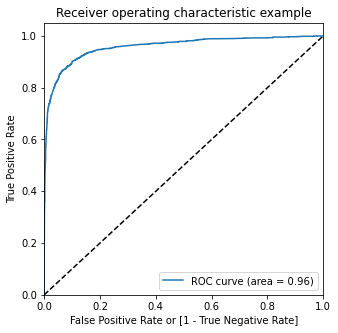

In [156]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [157]:
#Finding Optimal Cutoff Point

In [158]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.987124,4556,1,1,1,1,1,1,1,1,1,1,1
1,0,0.021662,2586,0,1,0,0,0,0,0,0,0,0,0
2,1,0.968161,8038,1,1,1,1,1,1,1,1,1,1,1
3,0,0.185685,5821,0,1,1,0,0,0,0,0,0,0,0
4,1,0.714317,5499,1,1,1,1,1,1,1,1,1,0,0


In [159]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.375764  1.000000  0.000000
0.1   0.1  0.830939  0.953427  0.757207
0.2   0.2  0.877662  0.934534  0.843428
0.3   0.3  0.892191  0.913445  0.879397
0.4   0.4  0.903913  0.882250  0.916953
0.5   0.5  0.909361  0.861160  0.938376
0.6   0.6  0.905234  0.824692  0.953716
0.7   0.7  0.896649  0.764938  0.975932
0.8   0.8  0.887898  0.727592  0.984396
0.9   0.9  0.854218  0.625220  0.992066


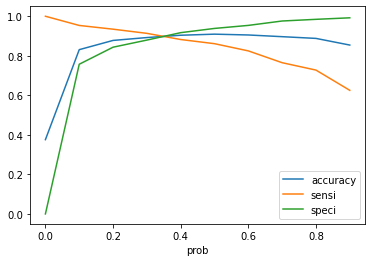

In [160]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [161]:
#From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [162]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.987124,4556,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.021662,2586,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.968161,8038,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.185685,5821,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.714317,5499,1,1,1,1,1,1,1,1,1,0,0,1


In [163]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.903912828132739

In [164]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3467,  314],
       [ 268, 2008]], dtype=int64)

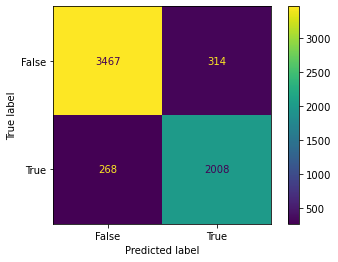

In [165]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_train_pred_final["Converted"],y_train_pred_final["Predicted"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion2,display_labels=[False,True])
cm_display.plot()
plt.show()

In [166]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [167]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8822495606326889

In [168]:
# Let us calculate specificity
TN / float(TN+FP)

0.9169531869875694

In [169]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.08304681301243057


In [170]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8647717484926787


In [171]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9282463186077644


In [172]:
# Precision: TP / TP + FP

In [173]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8937528499772002

In [174]:
# Recall: TP / TP + FN

In [175]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8611599297012302

In [176]:
#printing metrics
print('Final metrics on the Train data:')
print("Accuracy :",round(100*metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2),"%")
print("Sensitivity :",round(100*TP / float(TP+FN),2),"%")
print("Specificity :",round(100*TN / float(TN+FP),2),"%")
print("Recall :",round(100*confusion[1,1]/(confusion[1,0]+confusion[1,1]),2),"%")
print("Precision :",round(100*confusion[1,1]/(confusion[0,1]+confusion[1,1]),2),"%")

Final metrics on the Train data:
Accuracy : 90.39 %
Sensitivity : 88.22 %
Specificity : 91.7 %
Recall : 86.12 %
Precision : 89.38 %


Observation with 0.4 cutoff:

Below are the metrics on Train data:
    
Accuracy : 90.39%
Sensitivity : 88.22%
Specificity : 91.7%

precision : 89.38%
recall : 86.12%

In [177]:
# Precision and recall tradeoff

In [178]:
#from sklearn.metrics import precision_recall_curve

In [179]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

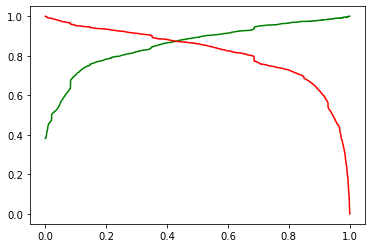

In [180]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [181]:
# Step 12 Making predictions on the test set

In [182]:
# scalling th test set

scaler = StandardScaler()

X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit']])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Last_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Country_Outside India,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specialization,Specialization_Media and Advertising,Specialization_Not Specified_Specialization,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Closed by Horizzon,Tags_Interested in other courses_batch,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others_Last_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2629,0,-1.182129,-0.860122,-1.197256,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
390,0,-0.344230,-0.692618,-0.103781,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
325,0,0.912620,-0.752175,1.536432,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4196,0,2.588419,-0.424612,-0.213129,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2198,0,0.074720,0.632522,0.442956,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [183]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Specialization_Not Specified_Specialization,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Other_Tags,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
2629,0,-0.860122,0,0,1,0,0,0,0,0,1,0,0,0,1,0
390,0,-0.692618,0,0,0,0,0,1,0,0,0,0,0,0,1,0
325,0,-0.752175,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4196,0,-0.424612,1,0,0,0,0,0,0,0,1,0,0,1,0,1
2198,0,0.632522,1,0,0,0,0,0,0,0,1,0,0,0,1,1


In [184]:
X_test_sm = sm.add_constant(X_test)

In [185]:
X_test_sm.shape

(2596, 17)

In [186]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2629    0.967268
390     0.042026
325     0.004954
4196    0.449887
2198    0.969447
6255    0.929363
1511    0.959480
4168    0.982468
7519    0.345477
9234    0.622661
dtype: float64

In [187]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2629,0.967268
390,0.042026
325,0.004954
4196,0.449887
2198,0.969447


In [188]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [189]:
# Putting Prospect_ID to index
y_test_df['Prospect ID'] = y_test_df.index
y_test_df.head()

,Converted,Prospect ID
2629,1,2629
390,0,390
325,0,325
4196,0,4196
2198,1,2198


In [190]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [191]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,2629,0.967268
1,0,390,0.042026
2,0,325,0.004954
3,0,4196,0.449887
4,1,2198,0.969447


In [192]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [193]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,2629,0.967268
1,0,390,0.042026
2,0,325,0.004954
3,0,4196,0.449887
4,1,2198,0.969447


In [194]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]

# applying cutoff to predict the coversion
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,2629,1,0.967268,1
1,390,0,0.042026,0
2,325,0,0.004954,0
3,4196,0,0.449887,1
4,2198,1,0.969447,1


In [195]:
# Calculating lead score
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [196]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,2629,1,0.967268,1,97
1,390,0,0.042026,0,4
2,325,0,0.004954,0,0
3,4196,0,0.449887,1,45
4,2198,1,0.969447,1,97


In [197]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9021571648690293

In [198]:
# confussion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1481,  150],
       [ 104,  861]], dtype=int64)

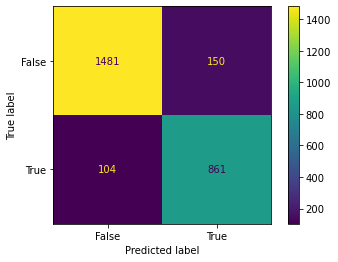

In [199]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_pred_final["Converted"],y_pred_final["final_predicted"])
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion2,display_labels=[False,True])
cm_display.plot()
plt.show()

In [200]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [201]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8922279792746114

In [202]:
# Let us calculate specificity
TN / float(TN+FP)

0.9080318822808093

In [203]:
# # Precision: TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8937528499772002

In [204]:
# Recall: TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8611599297012302

In [205]:
#printing metrics
print('Final metrics on the Test data:')
print("Accuracy :",round(100*metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),2),"%")
print("Sensitivity :",round(100*TP / float(TP+FN),2),"%")
print("Specificity :",round(100*TN / float(TN+FP),2),"%")
print("Recall :",round(100*confusion[1,1]/(confusion[1,0]+confusion[1,1]),2),"%")
print("Precision :",round(100*confusion[1,1]/(confusion[0,1]+confusion[1,1]),2),"%")

Final metrics on the Test data:
Accuracy : 90.22 %
Sensitivity : 89.22 %
Specificity : 90.8 %
Recall : 86.12 %
Precision : 89.38 %


Observation:
Below are the metrics on Test data:

Accuracy : 90.22%
Sensitivity : 89.22%
Specificity : 90.8%

precision: 89.38%
recall: 86.12%

Comparing Test and Train Results with the cutoff 0.4

Train data:
    
Accuracy : 90.39%
Sensitivity : 88.22%
Specificity : 91.7%

precision : 89.38%
recall : 86.12%

Test data:

Accuracy : 90.22%
Sensitivity : 89.22%
Specificity : 90.8%

precision: 89.38%
recall: 86.12%

Based on the above results, the Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

In [206]:
# fninding important features
res.params.sort_values(ascending=False)

Tags_Closed by Horizzon                                 8.848068
Tags_Will revert after reading the email                5.502250
What is your current occupation_Working Professional    4.445083
Lead Source_Welingak Website                            3.818942
What is your current occupation_Student                 3.309569
What is your current occupation_Unemployed              3.176903
Tags_Other_Tags                                         2.969220
What is your current occupation_Other_Occupation        2.628525
Lead Source_Reference                                   2.567336
Last Notable Activity_SMS Sent                          1.783493
Total Time Spent on Website                             1.064529
Lead Source_Olark Chat                                  0.921393
Lead Origin_Landing Page Submission                    -0.733999
Specialization_Not Specified_Specialization            -0.946737
Last Activity_Olark Chat Conversation                  -1.412659
Do Not Email             

Recommendations:
    
Company should make calls to the leads coing below category;

Tags with Closed by Horizzon
Tags with Will revert after reading the email
Leads who are Working Professional, Student and Unemployed
Lead Source from Welingak Website

Company should not make calls to the leads coing below category;
Lead Origin with Landing Page Submission
Specialization Not Specified
Lead opted for Do Not Email

In [207]:
# Finding hot leads
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads.shape

(708, 5)

There are 708 leads which can be contacted and have a high chance of getting converted.The Prospect ID of the customers to be contacted are :

In [208]:
# prospect ids for hot leads

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

array([2629, 2198, 6255, 1511, 4168,  804, 3437, 2868, 4151, 7220, 4477,
        576, 4963, 5443, 2133, 3439, 4004, 4614, 6728, 4997, 7883,  810,
       9169,  331, 3180, 5362, 8049, 5074, 3455, 6134, 7314, 4957, 5802,
       7490, 2866, 3188, 5559, 7096, 3074, 8060, 5799, 5839,  260, 3524,
       1567, 2560, 7857, 4154,   84, 8089, 3721, 4197, 1630, 4048, 8677,
       2155, 1667, 1512, 7506, 6301, 4044, 1269,  242,  934, 7051, 8443,
        925, 4569, 2105, 6774, 1416, 3021, 6375, 2457, 3614, 5801,  838,
       3359, 8128, 2729, 4181, 2622, 1595, 4625, 1575, 8515, 5524, 6037,
       6314, 6480, 2541, 7229, 5190, 2534, 3608, 4675, 1869, 4088, 7750,
       2614, 2114, 4241, 7391, 7167, 4528, 7470, 3182, 9076, 4005, 6528,
       1926, 2655,  848, 3710, 5141, 7805, 3739, 3194, 3635, 9227, 2359,
       1335, 9162, 3012, 4913, 3655, 6944, 4827, 9219,  137, 4179,  548,
       4038, 3049, 2959, 1612, 4403, 5661, 5687, 1067, 1563, 7419,  788,
       3390, 7508, 1265, 7536, 6994, 3932,  164, 36

In [209]:
# Top 10 hot leads
hot_leads.head(10)

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,2629,1,0.967268,1,97
4,2198,1,0.969447,1,97
5,6255,1,0.929363,1,93
6,1511,1,0.959480,1,96
7,4168,1,0.982468,1,98
10,804,1,0.920392,1,92
12,3437,1,0.920763,1,92
15,2868,1,0.962547,1,96
28,4151,1,0.986205,1,99
29,7220,1,0.963268,1,96
